In [1]:
import matplotlib.pyplot as plt

In [2]:
import scipy.optimize as opt

In [3]:
import numpy as np

In [4]:
k=0.187#0.158
b=-237.64#-147.36

In [29]:
(5**2*1.2/2)/k
b/k+200

-1070.802139037433

In [30]:
def getd(file):
    d=[]
    for l in open(file):
        d.append(list(map(float,l[:-1].split())))
    return np.array(d)

dat=[]
for i in range(10):
    dat.append(getd(f'{i}0.txt'))
dat=np.array(dat)
#print(dat[:,:,0])
rho=1.2
dat[:,:,0]+=b/k+200#+130
dat[:,:,0][dat[:,:,0]<0]=0
print(np.min(dat[:,:,0]))
dat[:,:,0]=np.sqrt(2*(dat[:,:,0]*k)/rho)

0.0


In [31]:
from scipy.signal import savgol_filter
for i in range(10):
    continue
    dat[i,:,0]=savgol_filter(dat[i,:,0],6,5)

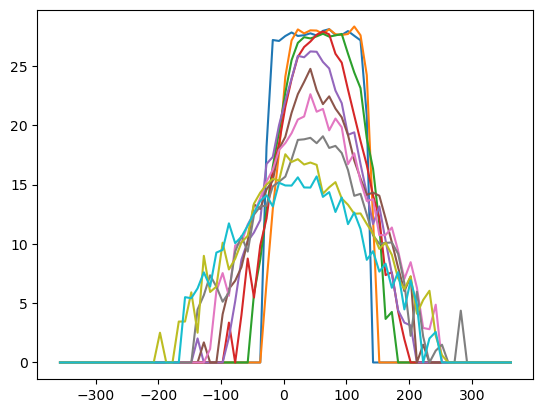

In [32]:
for i in range(10):
    plt.plot(dat[i,:,1],dat[i,:,0])

In [33]:
def func2(x,sig,x0):
    return np.exp(-((x-x0)/sig)**2/2)/(sig*np.sqrt(2*np.pi))
def func(x,a,b,c):
    return x*x*a+x*b+c
    
popt, pcov = opt.curve_fit(func, dat[0,:,1], dat[0,:,0])
popt

array([-1.55902312e-04,  7.85388422e-03,  1.31055748e+01])

In [34]:
import scipy
z=np.polyfit(dat[0,:,1], -dat[0,:,0], 10)
pl=np.poly1d(z)
m=scipy.optimize.minimize_scalar(pl,bounds=(-200,200), method='bounded')
m

 message: Solution found.
 success: True
  status: 0
     fun: -30.8506234812496
       x: 54.835465499990335
     nit: 10
    nfev: 10

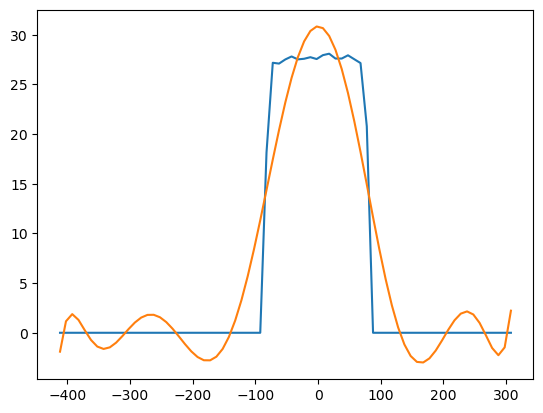

In [35]:
 plt.plot(dat[0,:,1]-m.x,dat[0,:,0])
 plt.plot(dat[i,:,1]-m.x,-pl(dat[i,:,1]))

In [36]:
for i in range(10):
    z=np.polyfit(dat[i,:,1], -dat[i,:,0], 10)
    pl=np.poly1d(z)
    m=scipy.optimize.minimize_scalar(pl,bounds=(-200,200), method='bounded')
    dat[i,:,1]-=m.x
    continue
    print(np.where(np.abs(dat[i,:,1])<10))
    for j in range(np.where(np.abs(dat[i,:,1])<10)[0][0]+2,dat[i,:,1].shape[0]):
        if dat[i,j-1,0]<0.15 or dat[i,j-2,0]<0.15:
            dat[i,j,0]=0
    for j in range(np.where(dat[i,:,1]<10)[0][0]-2,-1,-1):
        if dat[i,j+1,0]<0.15 or dat[i,j+2,0]<0.15:
            dat[i,j,0]=0

In [37]:
np.where(np.abs(dat[i,:,1])<10)[0][0]

np.int64(34)

In [38]:
dat[i,:,1]

array([ 342.94919774,  332.94919774,  322.94919774,  312.94919774,
        302.94919774,  292.94919774,  282.94919774,  272.94919774,
        262.94919774,  252.94919774,  242.94919774,  232.94919774,
        222.94919774,  212.94919774,  202.94919774,  192.94919774,
        182.94919774,  172.94919774,  162.94919774,  152.94919774,
        142.94919774,  132.94919774,  122.94919774,  112.94919774,
        102.94919774,   92.94919774,   82.94919774,   72.94919774,
         62.94919774,   52.94919774,   42.94919774,   32.94919774,
         22.94919774,   12.94919774,    2.94919774,   -7.05080226,
        -17.05080226,  -27.05080226,  -37.05080226,  -47.05080226,
        -57.05080226,  -67.05080226,  -77.05080226,  -87.05080226,
        -97.05080226, -107.05080226, -117.05080226, -127.05080226,
       -137.05080226, -147.05080226, -157.05080226, -167.05080226,
       -177.05080226, -187.05080226, -197.05080226, -207.05080226,
       -217.05080226, -227.05080226, -237.05080226, -247.05080

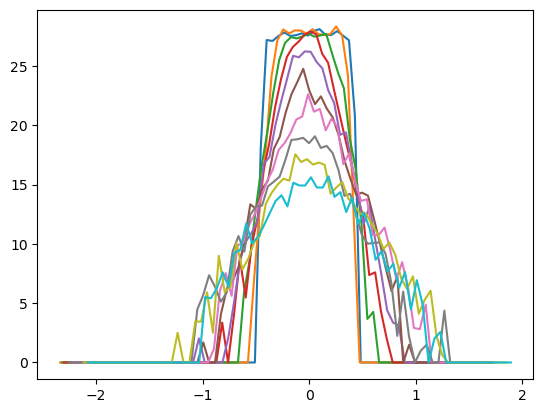

In [39]:
for i in range(10):
    plt.plot(dat[i,:,1]*5.52e-3,dat[i,:,0])

In [40]:
Q=np.zeros(10)
d=5.52e-5
for i in range(10):
    for j in range(dat[i,:,0].shape[0]):
        Q[i]+=np.pi*(np.abs(dat[i,j,1])*d*10*d)*rho*dat[i,j,0]
Q*=1e3
Q

array([2.13252195, 1.96198003, 2.36195937, 2.62368382, 2.95653915,
       3.2830515 , 3.82170766, 3.71293736, 4.19178444, 3.77001452])

In [41]:
"""Q=np.zeros(10)
d=5.52e-5
for i in range(10):
    for j in range(dat[i,:,0].shape[0]-1):
        Q[i]+=np.pi*(np.abs(dat[i,j,1])*d*10*d)*rho*(dat[i,j,0]+dat[i,j+1,0])/2
Q*=1e3
Q"""

'Q=np.zeros(10)\nd=5.52e-5\nfor i in range(10):\n    for j in range(dat[i,:,0].shape[0]-1):\n        Q[i]+=np.pi*(np.abs(dat[i,j,1])*d*10*d)*rho*(dat[i,j,0]+dat[i,j+1,0])/2\nQ*=1e3\nQ'

In [42]:
25*(0.5/100)**2*1.2*np.pi * 1e3

2.356194490192345

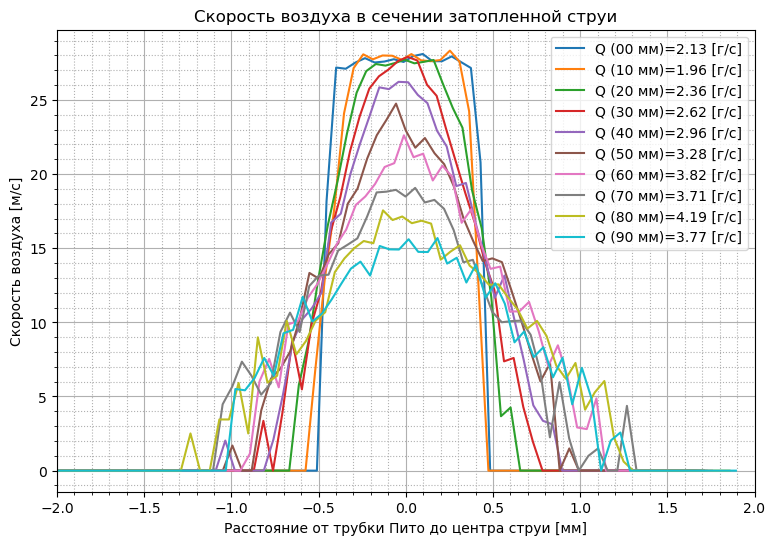

In [43]:
fig,ax=plt.subplots(figsize=(9,6))
ax.grid(which='major')
ax.grid(which='minor', linestyle=':')
ax.minorticks_on()
ax.set_xlim(-2,2)
ax.set_xlabel('Расстояние от трубки Пито до центра струи [см]')
ax.set_ylabel('Скорость воздуха [м/c]')
ax.set_title('Скорость воздуха в сечении затопленной струи')
for i in range(10):
    ax.plot(dat[i,:,1]*5.52e-3,dat[i,:,0], label=f'Q ({i}0 мм)={Q[i]:.2f} [г/c]')
ax.legend()
fig.savefig('final2.svg')

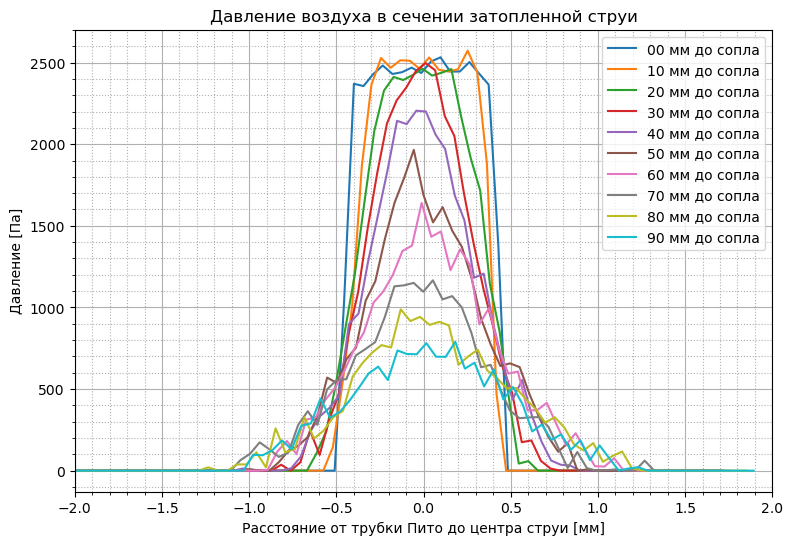

In [46]:
fig,ax=plt.subplots(figsize=(9,6))
ax.grid(which='major')
ax.grid(which='minor', linestyle=':')
ax.minorticks_on()
ax.set_xlim(-2,2)
ax.set_xlabel('Расстояние от трубки Пито до центра струи [см]')
ax.set_ylabel('Давление [Па]')
ax.set_title('Давление воздуха в сечении затопленной струи')
for i in range(10):# np.sqrt(2*(dat[:,:,0]*k)/rho)
    ax.plot(dat[i,:,1]*5.52e-3,rho*dat[i,:,0]**2/2/k, label=f'{i}0 мм до сопла')
ax.legend()
fig.savefig('pres2.svg')

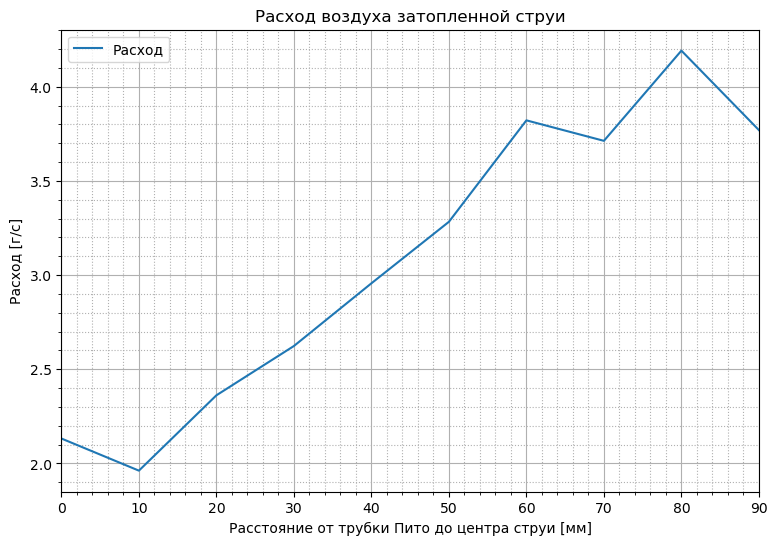

In [47]:
 fig,ax=plt.subplots(figsize=(9,6))
ax.grid(which='major')
ax.grid(which='minor', linestyle=':')
ax.minorticks_on()
ax.set_xlim(0,90)
ax.set_xlabel('Расстояние от трубки Пито до центра струи [мм]')
ax.set_ylabel('Расход [г/c]')
ax.set_title('Расход воздуха затопленной струи')
ax.plot(list(range(0,100,10)),Q, label=f'Расход')
ax.legend()
fig.savefig('Q2.svg')